Après avoir vu les différents types de nettoyage du texte possible dans le notebook précédent,
</br>
</br>(1) Nous allons maintenant étudier comment extraire l'information du texte pour le traitement ultérieur par des modèles de machine learning
</br>
</br>(2) Puis, nous modéliserons nos sujet avec une méthode non supervisé : Lattent Dirichlet Allocation (LDA).
</br>
</br>(3) Enfin, nous utiliserons des méthodes supervisées afin d'assigner à chaque document les tags associés.

https://www.kaggle.com/code/miljan/predicting-tags-for-stackoverflow/notebook

# <font color = Green>Partie 1 : Création de features</font>

## <font color = purple>1. Préléminaires</font>

### <font color = grey>1.1 Contexte</font>

Cette Partie est dédiée à la Transformation de notre Texte et donc à la création de features exploitable pour le Machine Learning.
</br>Nous allons Testser différentes méthodes de représentation de nos document :
</br>
</br>&emsp;<b>(1) Méthodes de comptage direct</b> (fréquence ou tf-idf) :
</br>&emsp;&ensp;- Approche Bag of Words
</br>&emsp;&ensp;- Approche n-gram (Bag of words généralisé)
</br>&emsp;&ensp;- Approche TF-IDF
</br>
</br>&emsp;<b>(2) Méthode plongement de mot :</b>
</br>&emsp;&ensp;- Word2Vec
</br>&emsp;&ensp;- Doc2Vec
</br>
</br>&emsp;<b>(3) BERT</b>
</br>
</br>&emsp;<b>(4) USE</b>


### <font color = grey>1.2 Librairies</font>

In [10]:
# Classiques
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Text processing
import nltk


# Model
from sklearn.feature_extraction.text import CountVectorizer #pour le bag of word et n-grams
from sklearn.feature_extraction.text import TfidfVectorizer #pour le tf idf
from sklearn.manifold import TSNE #pour le tsne
from sklearn.decomposition import LatentDirichletAllocation #pour la lda

#Gensim & setup login
import gensim 
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) #set up login

### <font color = grey>1.3 Chargement des données</font>

In [11]:
#Chemin de notre fichier source
data = "cleaned/"
os.listdir(data)

#Chargement du Dataframe
fn = data + 'final_df.csv'
df = pd.read_csv(fn)
df.head()

,Title,Body,Tags,clean_title
0,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<bash><shell><variables><scope><declare>,differ declar local variabl bash
1,Dealing with PHP server and MySQL server in di...,<p>For those of us who use standard shared hos...,<php><mysql><datetime><date><timezone>,deal php server mysql server differ time
2,Difference between async/await and ES6 yield w...,<p>I was just reading this fantastic article «...,<javascript><node.js><ecmascript-6><generator>...,differ async await yield gener
3,Loading System.ServiceModel configuration sect...,"<p>Using C# .NET 3.5 and WCF, I'm trying to wr...",<c#><.net><xml><wcf><configurationmanager>,load system configur section use
4,XML Serialization and Inherited Types,"<p>Following on from my <a href=""https://stack...",<c#><xml><inheritance><serialization><xml-seri...,xml serial inherit type


-----

## <font color = purple>2. approche Bag of Words</font>

On drop les NaN

In [12]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Title,Body,Tags,clean_title
53,What is a Y-combinator?,<p>A Y-combinator is a computer science concep...,<functional-programming><computer-science><the...,NaN
324,"What does if __name__ == ""__main__"": do?","<p>What does this do, and why should one inclu...",<python><namespaces><main><python-module><idioms>,NaN
741,"A* heuristic, overestimation/underestimation?",<p>I am confused about the terms overestimatio...,<algorithm><search><graph><artificial-intellig...,NaN
1564,What are vdso and vsyscall?,<p>I did <code>sudo cat /proc/1/maps -vv</code...,<c><linux><linux-kernel><kernel><vdso>,NaN
1847,Grokking Timsort,<p>There's a (relatively) new sort on the bloc...,<java><python><algorithm><sorting><timsort>,NaN
2162,Atomicity on x86,<blockquote>\n <h2>8.1.2 Bus Locking</h2>\n ...,<c++><multithreading><x86><atomic><memory-barr...,NaN
2726,Checkstyle vs. PMD,<p>We are introducing static analysis tools in...,<java><static-analysis><findbugs><checkstyle><...,NaN
4037,What is a clearfix?,<p>Recently I was looking through some website...,<html><css><layout><cross-browser><clearfix>,NaN
4303,Why there is no ConcurrentHashSet against Conc...,<p>HashSet is based on HashMap.</p>\n\n<p>If w...,<java><collections><concurrency><hashmap><hash...,NaN
7847,What is 1LL or 2LL in C and C++?,<p>I was looking at some of the solutions in G...,<c++><c><math><long-integer><cmath>,NaN


In [13]:
df = df.dropna()

In [14]:
#Initialize
CountVec = CountVectorizer(ngram_range=(1,1)) # to use bigrams ngram_range=(2,2)

#transform
Count_data = CountVec.fit_transform(df["clean_title"])

#create dataframe
X_bag_of_words=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names_out())

In [15]:
#affichage
X_bag_of_words.head(10)

,aac,aadhaar,aapt,aar,ab,abaddressbook,abbrevi,abi,abl,abort,...,zone,zookeep,zoom,zoomabl,zoomtablemanag,zpl,zsh,zuul,zxing,zzabn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <font color = purple>3. approche n-gram </font>

stop_words: Since CountVectorizer just counts the occurrences of each word in its vocabulary, extremely common words like ‘the’, ‘and’, etc. will become very important features while they add little meaning to the text. Your model can often be improved if you don’t take those words into account. Stop words are just a list of words you don’t want to use as features. You can set the parameter stop_words=’english’ to use a built-in list. Alternatively you can set stop_words equal to some custom list. This parameter defaults to None.
ngram_range: An n-gram is just a string of n words in a row. E.g. the sentence ‘I am Groot’ contains the 2-grams ‘I am’ and ‘am Groot’. The sentence is itself a 3-gram. Set the parameter ngram_range=(a,b) where a is the minimum and b is the maximum size of ngrams you want to include in your features. The default ngram_range is (1,1).
In a recent project where I modeled job postings online, I found that including 2-grams as features boosted my model’s predictive power significantly. This makes intuitive sense; many job titles such as ‘data scientist’, ‘data engineer’, and ‘data analyst’ are 2 words long.
min_df, max_df: These are the minimum and maximum document frequencies words/n-grams must have to be used as features. If either of these parameters are set to integers, they will be used as bounds on the number of documents each feature must be in to be considered as a feature. If either is set to a float, that number will be interpreted as a frequency rather than a numerical limit. min_df defaults to 1 (int) and max_df defaults to 1.0 (float).
max_features: This parameter is pretty self-explanatory. The CountVectorizer will choose the words/features that occur most frequently to be in its’ vocabulary and drop everything else.
You would set these parameters when initializing your CountVectorizer object as shown below.

In [16]:
#Initialize
CountVec = CountVectorizer(ngram_range=(2,2)) # to use bigrams ngram_range=(2,2)

#transform
Count_data = CountVec.fit_transform(df["clean_title"])

#create dataframe
X_bigram=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names_out())

In [17]:
X_bigram.sample(10)

,aac encod,aac stream,aadhaar card,aadhaar number,aapt adb,aapt ioexcept,aar depend,aar file,aar includ,aar jar,...,zsh configur,zsh mac,zsh recogn,zsh termin,zsh theme,zsh without,zuul authent,zuul nginx,zxing librari,zxing reader
15097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


PRB == Matrice creuse !, peut être regler (sur le net)

## <font color = purple>4. approche TF - IDF </font>

In [18]:
#Initialize
tfidf = TfidfVectorizer(ngram_range=(1,1))
 
#transform
result = tfidf.fit_transform(df["clean_title"])

#create dataframe
X_tfidf=pd.DataFrame(result.toarray(),columns=tfidf.get_feature_names_out())

In [19]:
X_tfidf.sample(10)

,aac,aadhaar,aapt,aar,ab,abaddressbook,abbrevi,abi,abl,abort,...,zone,zookeep,zoom,zoomabl,zoomtablemanag,zpl,zsh,zuul,zxing,zzabn
12076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


NMF (autre méthode)

## <font color = purple>5. Plongement de mots avec Word2Vec et  Doc2Vec</font>

### <font color = green>1. Documentation</font>

https://www.kaggle.com/code/pierremegret/gensim-word2vec-tutorial/notebook

https://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/

https://edumunozsala.github.io/BlogEms/jupyter/nlp/classification/embeddings/python/2020/08/15/Intro_NLP_WordEmbeddings_Classification.html#Word-embeddings

<b>Applying the word embedding to a text classification task</b>
Now, we have our word representation, a vector for every word in our vocabulary. But we need to deal with full sentences so we need to create a sentence embedding, basically we need a vector that represent the whole sentence and every feature in the vector will be based on the word embeddings. There are many posibilities and we are notr going to cover this topic, so we apply a very simple method: the ith value in the sentence embedding will be the mean of the ith values in the word embedding of all the words in the sentence.

We will create a class that will contain our vocabulary and glove vectors and then it will transform every review (a sentence in our example) to a vector representation as we describe previously.

https://towardsdatascience.com/multi-class-text-classification-with-doc2vec-logistic-regression-9da9947b43f4

https://github.com/RaRe-Technologies/gensim/blob/3c3506d51a2caf6b890de3b1b32a8b85f7566ca5/docs/notebooks/doc2vec-IMDB.ipynb

Sympa : https://linanqiu.github.io/2015/10/07/word2vec-sentiment/

### <font color = green>2. Word2Vec</font>

#### <font color = grey>a. Model</font>

In [20]:
# Create list of tokens
tokens = df["clean_title"].values.tolist()

# Tokenizing strings in list of strings
res = [sub.split() for sub in tokens]

In [21]:
# Initialize model
model = gensim.models.Word2Vec(res, vector_size = 100, window=10, min_count=2, workers=10)

# Train the model
model.train(res,total_examples=len(res),epochs=10)

2022-09-15 11:18:26,302 : INFO : collecting all words and their counts
2022-09-15 11:18:26,303 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-09-15 11:18:26,315 : INFO : PROGRESS: at sentence #10000, processed 53677 words, keeping 4268 word types
2022-09-15 11:18:26,325 : INFO : PROGRESS: at sentence #20000, processed 108033 words, keeping 5160 word types
2022-09-15 11:18:26,337 : INFO : collected 5486 word types from a corpus of 150167 raw words and 27617 sentences
2022-09-15 11:18:26,338 : INFO : Creating a fresh vocabulary
2022-09-15 11:18:26,352 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 4724 unique words (86.11009843237332%% of original 5486, drops 762)', 'datetime': '2022-09-15T11:18:26.352895', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'prepare_vocab'}
2022-09-15 11:18:26,353 : INFO : Word2Vec lifecycle event {'ms

(1386982, 1501670)

#### <font color = grey>b. Similarité entre les mots</font>

In [22]:
#Observer le vecteur de "use"
model.wv["use"]

array([-0.00291327, -0.01200951,  0.08554024,  0.15026727, -0.28286892,
       -0.6413834 , -0.02745133, -0.14826028, -0.47193542, -0.495717  ,
        0.10096497, -0.63321036,  0.16774002,  0.24025698, -0.5537515 ,
       -0.5507808 ,  0.00749892, -0.1523475 ,  0.02497123, -0.6951829 ,
        0.46845347,  0.07849474,  0.22336951, -0.04025272, -0.20980689,
       -0.35480982, -0.23604944,  0.0590604 , -0.4383621 , -0.10836419,
        0.10069588,  0.04639976,  0.2724082 , -0.79360205,  0.01830393,
        0.28087944,  0.11396765, -0.5176412 , -0.49375883,  0.24366483,
       -0.20259382,  0.3183243 , -0.6325876 ,  0.1212915 ,  0.44938102,
       -0.21542129,  0.48451617, -0.19714376,  0.23206845,  0.43334085,
       -0.02340298, -0.5089483 ,  0.03872166,  0.33678886,  0.1163571 ,
        0.12994683,  0.0146579 , -0.3765768 , -0.0527144 , -0.30026007,
       -0.18708004,  0.69363755, -0.9703474 , -0.43856505,  0.26925972,
        0.06975156, -0.06456309,  0.3984264 ,  0.17524247,  0.28

In [23]:
#Les mots les plus similaire à use
w1 = "use"
model.wv.most_similar(positive=w1)

[('work', 0.5283286571502686),
 ('crypto', 0.5250285267829895),
 ('deal', 0.5183819532394409),
 ('transfer', 0.5167441964149475),
 ('horizon', 0.5115864276885986),
 ('differ', 0.5022417306900024),
 ('docstr', 0.4989990293979645),
 ('textual', 0.49837663769721985),
 ('answer', 0.4949119985103607),
 ('decor', 0.493274986743927)]

In [24]:
#Les 6 mots les plus similaire à python
w1 = ["python"]
model.wv.most_similar (positive=w1,topn=6)

[('perl', 0.6589549779891968),
 ('distutil', 0.6336919069290161),
 ('nltk', 0.624335527420044),
 ('setuptool', 0.6226927638053894),
 ('pillow', 0.6109544634819031),
 ('sy', 0.6024418473243713)]

In [25]:
#Similarité entre 2 mots :
model.wv.similarity(w1="java", w2="json")

0.34058356

In [26]:
#Similarité entre 2 mots identique :
model.wv.similarity(w1="java", w2="java")

1.0

In [27]:
# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['use', 'java', 'python']}
similar_words

{'use': ['work', 'crypto', 'deal', 'transfer', 'horizon'],
 'java': ['util', 'scala', 'lang', 'lcom', 'bcel'],
 'python': ['perl', 'distutil', 'nltk', 'setuptool', 'pillow']}

#### <font color = grey>c. Vizualisation TSNE</font>

c:\Users\Anthony\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Anthony\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


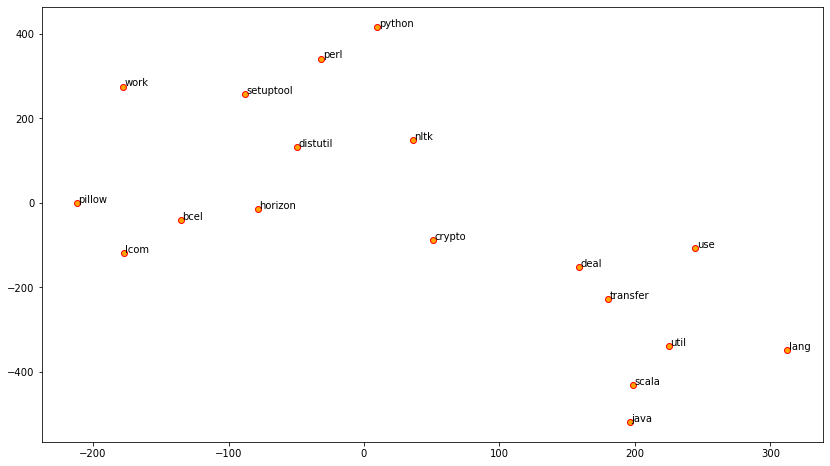

In [28]:
words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

### <font color = green>3. Doc2Vec</font>

## <font color = purple>6. BERT </font>

## <font color = purple>7. USE </font>

# <font color = Green>Partie 2 : Approche non supervisée : LDA</font>

## <font color = purple>1. Préléminaires</font>

Dans le monde actuel, où la quantité de texte non structuré, augmente drastiquement (commentaires, articles de blog, etc.), il serait vraiment utile d’avoir des outils qui permettent de structurer automatiquement l’information, de manière à pouvoir rapidement accéder à ce qui nous intéresse, filtrer le bruit mais aussi détecter l’apparition de nouveau sujet d’intérêts.

La première méthode vraiment efficace est nommé LDA (Latent Dirichlet Allocation). C’est une méthode non-supervisée générative qui se base sur les hypothèses suivantes :

Chaque document du corpus est un ensemble de mots sans ordre (bag-of-words) ;

Chaque document m aborde un certain nombre de thèmes dans différentes proportions qui lui sont propres p(θm) ;

Chaque mot possède une distribution associée à chaque thème p(ϕk) . On peut ainsi représenter chaque thème par une probabilité sur chaque mot.

 zn représente le thème du mot wn

Puisque l'on a accès uniquement aux documents, on doit déterminer quels sont les thèmes, les distributions de chaque mot sur les thèmes, la fréquence d’apparition de chaque thème sur le corpus.

Une représentation formelle sous forme de modèle probabiliste graphique est la suivante :

Modèle probabiliste

![title](image1.png)

https://towardsdatascience.com/tags-recommendation-algorithm-using-latent-dirichlet-allocation-lda-3f844abf99d7

## <font color = purple>2. Model</font>

In [29]:
#define number of topics
no_topics = 20

#Initialize the model
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50,random_state=11).fit(X_tfidf)

## <font color = purple>3. Topics vizualisation</font>

In [30]:
# define the function to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("--------------------------------------------")
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("--------------------------------------------")

In [31]:
# use the function
display_topics(lda, tfidf.get_feature_names(), 5)

--------------------------------------------
Topic 0:
properti find row line algorithm
--------------------------------------------
--------------------------------------------
Topic 1:
except singl network sign certif
--------------------------------------------
--------------------------------------------
Topic 2:
array work number numpi bit
--------------------------------------------
--------------------------------------------
Topic 3:
json html object updat loop
--------------------------------------------
--------------------------------------------
Topic 4:
list read store two queri
--------------------------------------------
--------------------------------------------
Topic 5:
instal connect error memori node
--------------------------------------------
--------------------------------------------
Topic 6:
net asp mvc git core
--------------------------------------------
--------------------------------------------
Topic 7:
selenium delet output rubi folder
-----------------

c:\Users\Anthony\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## <font color = purple>4. recommandation de Tags</font>

# <font color = Green>Partie 3 : Approche supervisée</font>